In [1]:
# import libraries
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from tensorflow.keras.layers import BatchNormalization
import os
from keras import utils as np_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print("-"*100)
print('y_train shape:', y_train.shape)
print("-"*100)
print('x_test shape:', x_test.shape)
print("-"*100)
print('y_test shape:', y_test.shape)
print("-"*100)
print(x_train.shape[0], 'train samples')
print("-"*100)
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
----------------------------------------------------------------------------------------------------
y_train shape: (50000, 1)
----------------------------------------------------------------------------------------------------
x_test shape: (10000, 32, 32, 3)
----------------------------------------------------------------------------------------------------
y_test shape: (10000, 1)
----------------------------------------------------------------------------------------------------
50000 train samples
----------------------------------------------------------------------------------------------------
10000 test samples


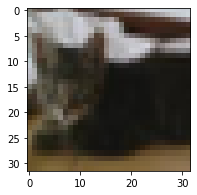

In [3]:
# checking the images
fig = plt.figure(figsize=(8,3))
plt.imshow(x_train[9])

In [4]:
# checking the unique columns in the label column 
np.unique(y_train,)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Ploting some of the images using subplot

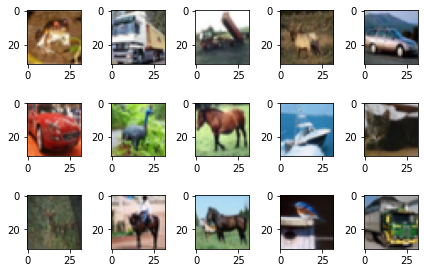

In [5]:
fig=plt.figure()
ax=[]
for i in range(15):
  ax.append( fig.add_subplot(3, 5, i+1) )
  subplot_title=("Subplot")
  plt.imshow(x_train[i])
fig.tight_layout()
plt.show()


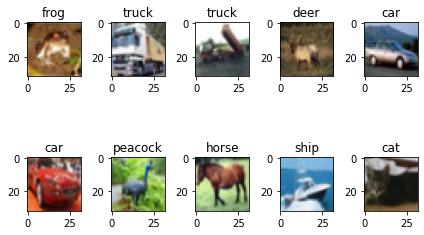

In [6]:
class_names = ['frog','truck','truck','deer','car',
               'car','peacock','horse','ship','cat']
fig=plt.figure()
ax=[]
for i in range(10):
  ax.append( fig.add_subplot(2, 5, i+1) )
  subplot_title=class_names[i]
  ax[-1].set_title(subplot_title)  
  plt.imshow(x_train[i])
fig.tight_layout()
plt.show()

We cant use reshape thats why we import and use util libabry

In [74]:

# reshaping the data
y_train=y_train.reshape(len(y_train),10) #as num of uniue value is 10 in label column

ValueError: ignored

In [8]:
from keras import utils as np_utils

In [9]:
# resgaping the y_train and y_test
y_train=keras.utils.np_utils.to_categorical(y_train,10)
y_test=keras.utils.np_utils.to_categorical(y_test,10)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

y_train shape (50000, 10)
y_test shape (10000, 10)


In [10]:
# we know
x_train.shape[1:]


(32, 32, 3)

In [11]:
# Model Architecture
model=keras.Sequential()
layers=keras.layers
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=x_train.shape[1:]))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(units=512,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        18464     
                                                        

In [13]:
# compile the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
# check type of x_train,x_test
print(x_train.dtype)
print("-"*100)
print(x_test.dtype)

uint8
----------------------------------------------------------------------------------------------------
uint8


In [15]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
print(x_train.dtype)
print("-"*100)
print(x_test.dtype)

float32
----------------------------------------------------------------------------------------------------
float32


In [16]:
# Normalize the data
x_train=x_train/255.0
x_test=x_test/255.0

In [17]:
# fit the model
model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 29s 11ms/step - loss: 1.6130 - accuracy: 0.4066 - val_loss: 1.3031 - val_accuracy: 0.5294
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2597 - accuracy: 0.5486 - val_loss: 1.1231 - val_accuracy: 0.5976
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1150 - accuracy: 0.6047 - val_loss: 0.9484 - val_accuracy: 0.6636
Epoch 4/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0123 - accuracy: 0.6404 - val_loss: 0.8969 - val_accuracy: 0.6871
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9380 - accuracy: 0.6696 - val_loss: 0.8459 - val_accuracy: 0.6990
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8923 - accuracy: 0.6850 - val_loss: 0.8518 - val_accuracy: 0.7034
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8585 - accuracy: 0.6996 - val_loss: 0.8089 -

Here accuracy(.7533) and validation accuracy(.7646) at the end of 10 epoch is close to each other we can say its a ideal model

**Creating model by removing dropout except for output dense layer and introducing batch normalization**

In [18]:
# Creating model by removing dropout except for output dense layer and introducing batch normalization
# Model Architecture
model=keras.Sequential()
layers=keras.layers
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(units=512,activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation="softmax"))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [20]:
# compile the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [21]:
# fit the model
model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4313 - accuracy: 0.4997 - val_loss: 1.2356 - val_accuracy: 0.5540
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0127 - accuracy: 0.6461 - val_loss: 0.9137 - val_accuracy: 0.6805
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8582 - accuracy: 0.7020 - val_loss: 1.1183 - val_accuracy: 0.6181
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7628 - accuracy: 0.7336 - val_loss: 0.7854 - val_accuracy: 0.7252
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6880 - accuracy: 0.7598 - val_loss: 0.7233 - val_accuracy: 0.7522
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6263 - accuracy: 0.7819 - val_loss: 0.7551 - val_accuracy: 0.7474
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5727 - accuracy: 0.7988 - val_loss: 0.6789 -

Here see there is decent diff between accuracy and val_ccuracy, thats how dropouts helps in dealing with overfitting, but this model is a clear overfit

## Lets include dropout and batch normalization both

In [22]:
# Model Architecture
model_1=keras.Sequential()
layers=keras.layers
model_1.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=x_train.shape[1:]))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(layers.Dropout(0.25))

model_1.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(layers.Dropout(0.25))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(units=512,activation="relu"))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(10,activation="softmax"))

In [23]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [24]:
# compile the model
model_1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [25]:
# fit the model
model_1.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 20s 12ms/step - loss: 1.5660 - accuracy: 0.4510 - val_loss: 1.1959 - val_accuracy: 0.5738
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1374 - accuracy: 0.5988 - val_loss: 0.9870 - val_accuracy: 0.6547
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9765 - accuracy: 0.6596 - val_loss: 1.2626 - val_accuracy: 0.5934
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8834 - accuracy: 0.6906 - val_loss: 0.7795 - val_accuracy: 0.7319
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8224 - accuracy: 0.7128 - val_loss: 0.7252 - val_accuracy: 0.7480
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7760 - accuracy: 0.7317 - val_loss: 0.6803 - val_accuracy: 0.7624
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7273 - accuracy: 0.7453 - val_loss: 0.6853 -

**By adding dropouts and batch normalization the overfiiting is reduced as we can see yje accuracy and va_accuracy are close to each other**

# By adding the regularizatuion i.e L2(ridge regularization) and removing dropouts

In [26]:
from keras.regularizers import l2

In [27]:
# Model Architecture
model_1=keras.Sequential()
layers=keras.layers
model_1.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=x_train.shape[1:]))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))

model_1.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(units=512,activation="relu",kernel_regularizer=l2(.01)))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(10,activation="softmax"))

In [28]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [29]:
# compile the model
model_1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [30]:
# fit the model
model_1.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 20s 12ms/step - loss: 2.5756 - accuracy: 0.5070 - val_loss: 1.5698 - val_accuracy: 0.5894
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4219 - accuracy: 0.6387 - val_loss: 1.4945 - val_accuracy: 0.6208
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.3349 - accuracy: 0.6763 - val_loss: 1.3955 - val_accuracy: 0.6437
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2882 - accuracy: 0.6995 - val_loss: 1.3325 - val_accuracy: 0.6847
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2644 - accuracy: 0.7132 - val_loss: 1.2884 - val_accuracy: 0.7024
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2349 - accuracy: 0.7297 - val_loss: 1.2957 - val_accuracy: 0.7052
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2034 - accuracy: 0.7393 - val_loss: 1.2465 -

**Adding l2 regularization and removing the dropouts leads to overfitting**

# By adding the regularizatuion i.e L2(ridge regularization) and adding dropouts to

In [31]:
model_1=keras.Sequential()
layers=keras.layers
model_1.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=x_train.shape[1:]))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(layers.Dropout(0.25))

model_1.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model_1.add(layers.BatchNormalization())
model_1.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(layers.Dropout(0.25))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(units=512,activation="relu",kernel_regularizer=l2(.01)))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(10,activation="softmax"))

In [33]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [34]:
# compile the model
model_1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [35]:
# fit the model
model_1.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.8866 - accuracy: 0.4655 - val_loss: 1.6488 - val_accuracy: 0.5779
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5692 - accuracy: 0.6066 - val_loss: 1.5267 - val_accuracy: 0.6143
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4653 - accuracy: 0.6419 - val_loss: 1.3983 - val_accuracy: 0.6548
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4148 - accuracy: 0.6690 - val_loss: 1.3181 - val_accuracy: 0.7002
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3835 - accuracy: 0.6804 - val_loss: 1.3132 - val_accuracy: 0.7087
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3533 - accuracy: 0.6950 - val_loss: 1.2933 - val_accuracy: 0.7147
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3294 - accuracy: 0.7043 - val_loss: 1.3169 -

In [36]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.1756 - accuracy: 0.7510


[1.175553560256958, 0.7509999871253967]

**Model is performing fine here as test accuracy is more than that of train accuracy**

# Lets add more convolution Layer and see the result and using padding="same"

**Padding = Same:**
 means the input image ought to have zero padding so that the output in convolution doesnt differ in size as input. 

Note: (1-pixel border is 1 layer of zero pixel, 2-pixel border means 2 layers of pixel, depend on kernel we choose)

**Padding = Valid:**
 means we dont add the zero pixel padding around the input matrix, and its like saying, we are ready to loose some information. when we do valid padding, the convolution happens and based on kernel size we taking, only the inside pixel of input is considered to be ‘valid’ which appears in feature map.

In [41]:
model_2=keras.Sequential()
layers=keras.layers
model_2.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",input_shape=x_train.shape[1:]))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_2.add(layers.Dropout(0.25))

model_2.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_2.add(layers.Dropout(0.25))

# Adding more layer
model_2.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_2.add(layers.Dropout(0.25))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(units=512,activation="relu",kernel_regularizer=l2(.01)))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(10,activation="softmax"))

In [42]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_34 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_39 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_35 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                      

In [45]:
# compile the model
model_2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [46]:
# fit the model
model_2.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 2.5584 - accuracy: 0.4558 - val_loss: 1.5058 - val_accuracy: 0.5416
Epoch 2/10
1563/1563 [==============================] - 24s 16ms/step - loss: 1.3316 - accuracy: 0.6116 - val_loss: 1.1845 - val_accuracy: 0.6571
Epoch 3/10
1563/1563 [==============================] - 24s 16ms/step - loss: 1.1724 - accuracy: 0.6733 - val_loss: 1.0735 - val_accuracy: 0.7178
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1005 - accuracy: 0.7043 - val_loss: 0.9660 - val_accuracy: 0.7581
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0411 - accuracy: 0.7299 - val_loss: 1.0830 - val_accuracy: 0.7086
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0059 - accuracy: 0.7461 - val_loss: 0.9864 - val_accuracy: 0.7562
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9692 - accuracy: 0.7608 - val_loss: 0.9929 -

**Adding more layer also yield good result but it also add more parameters making model to take more time for computation**

# Adding feature map i.e to extract more features from the same patch, instead of 32 and 64 we now use 64 and 128

In [47]:
model_3=keras.Sequential()
layers=keras.layers
model_3.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu",input_shape=x_train.shape[1:]))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D(pool_size=(2,2)))
model_3.add(layers.Dropout(0.25))

model_3.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D(pool_size=(2,2)))
model_3.add(layers.Dropout(0.25))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(units=512,activation="relu",kernel_regularizer=l2(.01)))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(10,activation="softmax"))

In [48]:
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_40 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_45 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 batch_normalization_41 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                      

In [49]:
# compile the model
model_3.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [50]:
# fit the model
model_3.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 33s 20ms/step - loss: 3.4603 - accuracy: 0.4610 - val_loss: 2.0304 - val_accuracy: 0.5986
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.8466 - accuracy: 0.6416 - val_loss: 2.0538 - val_accuracy: 0.5581
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.7620 - accuracy: 0.6789 - val_loss: 1.8460 - val_accuracy: 0.6578
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.6874 - accuracy: 0.7075 - val_loss: 1.5801 - val_accuracy: 0.7426
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.6497 - accuracy: 0.7252 - val_loss: 1.8473 - val_accuracy: 0.6647
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5731 - accuracy: 0.7547 - val_loss: 1.5117 - val_accuracy: 0.7758
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5427 - accuracy: 0.7660 - val_loss: 1.6613 -

# Lets by proper hypertuning find the best parameters

In [51]:
!pip install keras-tuner

     |████████████████████████████████| 98 kB 4.8 MB/s 


In [58]:
from keras_tuner.tuners import RandomSearch
# Loading liabraries
import keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers,Sequential
from keras_tuner.tuners import RandomSearch
from keras.layers.convolutional import Conv2D

In [68]:
# Building Model
def build_model(hp):
  model=keras.Sequential()
  model.add(layers.Conv2D(
      filters=hp.Int("conv_1_filter",min_value=32,max_value=128,step=16),
      kernel_size=hp.Choice("conv_1_kernel",values=[3,5]),
      activation="relu",
      input_shape=x_train.shape[1:]
  ))

  model.add(layers.Conv2D(
      
      filters=hp.Int("conv_2_filter",min_value=32,max_value=64,step=16),
      kernel_size=hp.Choice("conv_2_kernel",values=[3,5]),
      activation="relu"
  ))
  model.add(layers.Flatten())
  model.add(layers.Dense(
      units=hp.Int("dense_1_unit",min_value=32,max_value=128,step=16),
      activation="relu"
  ))

  model.add(layers.Dense(10,activation="softmax")) # 10 here means length of output is 10

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [69]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [70]:
# Searching for best value for the model
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='outputs',project_name="CIFR10")

INFO:tensorflow:Reloading Oracle from existing project outputs/CIFR10/oracle.json


In [66]:
y_train.shape

(50000, 10)

In [72]:
#fitting the model
tuner_search.search(x_train,y_train,epochs=10,validation_split=0.1)

Trial 7 Complete [00h 03m 23s]
val_accuracy: 0.10580000281333923

Best val_accuracy So Far: 0.6539999842643738
Total elapsed time: 00h 14m 23s
INFO:tensorflow:Oracle triggered exit
